# Assess quality of sequencing run

The sequencing technologies usually produce basecalls with varying quality. In addition, there could be sample-specific issues in your sequencing run, such as adapter contamination. It is standard procedure to check the quality of the reads and identify problems before doing further analysis. 

Checking the quality and making some decisions for the downstream analysis can influence the outcome of your project.

In this exercise, we will try to use the `Rqc` package. The first step will be to install all required packages. 





In [5]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("Rqc")


Bioconductor version '3.10' is out-of-date; the current release version '3.12'
  is available with R version '4.0'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cloud.r-project.org


Bioconductor version 3.10 (BiocManager 1.30.12), R 3.6.3 (2020-02-29)

Installing package(s) 'BiocVersion', 'Rqc'

also installing the dependencies ‘httpuv’, ‘shiny’


Warning message in install.packages(...):
“installation of package ‘httpuv’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘shiny’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘Rqc’ had non-zero exit status”


To access this functionality, the user needs to load Rqc package.

In [9]:
library(Rqc)

Loading required package: BiocParallel

Loading required package: ShortRead

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: Biost

The second step will be to use a sequence file with the extention `fastq` that should be analyzed. This will produce an object with sequence quality-related results. The fastq file will be taken from the `ShortRead` package.The user must modify this location accordingly, in order to reflect the actual location of the files that need QA.


In [10]:
folder <- system.file(package="ShortRead", "extdata/E-MTAB-1147")


'/tmp/RtmptUAwZT/rqc_report.html' has been created.



The `rqc` function, which is what we are going to use, require two arguments: 

1. Path, is the location where the files of interest are saved at (this was defined on the step above). 

2. Pattern, is a regular expression that identifies all files of interest. Below, we use .fastq.gz to specify that all files containing that string are to be processed.




In [13]:
# feeds fastq.qz files in "folder" to quality check function

qcRes=rqc(path = folder, pattern = ".fastq.gz", openBrowser=FALSE)


'/tmp/RtmptUAwZT/rqc_report.html' has been created.



At this point, the user’s default Internet browser will open an HTML file. This file is the report generated by Rqc, which, by default, is stored in a temporary directory. A sample report is shown below:



In [11]:
qcRes

$ERR127302_1_subset.fastq.gz
class: RqcResultSet(3)
QA elements (access with qa[["elt"]]):
  perFile: list(2)
    information: data.frame(1 7)
    topReads: data.frame(10 2)
  perCycle: list(2)
    quality: data.frame(6768 4)
    baseCall: data.frame(360 3)
  perRead: list(3)
    width: data.frame(1 2)
    averageQuality: data.frame(1966 2)
    frequency: data.frame(7 2)

$ERR127302_2_subset.fastq.gz
class: RqcResultSet(3)
QA elements (access with qa[["elt"]]):
  perFile: list(2)
    information: data.frame(1 7)
    topReads: data.frame(10 2)
  perCycle: list(2)
    quality: data.frame(6768 4)
    baseCall: data.frame(360 3)
  perRead: list(3)
    width: data.frame(1 2)
    averageQuality: data.frame(2294 2)
    frequency: data.frame(7 2)


## Average Quality

This plot describes the average quality pattern by showing on the X-axis quality thresholds and on the Y-axis the percentage of reads that exceed that quality level.



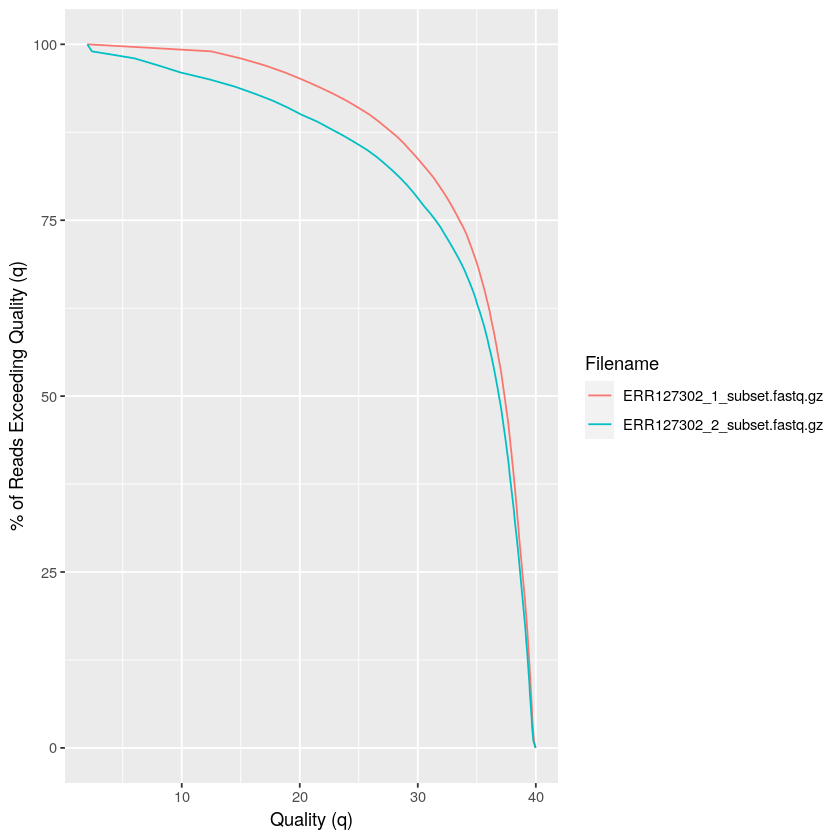

In [20]:
rqcReadQualityPlot(qcRes)


## Cycle-specific Average Quality

This describes the average quality scores for each cycle of sequencing.

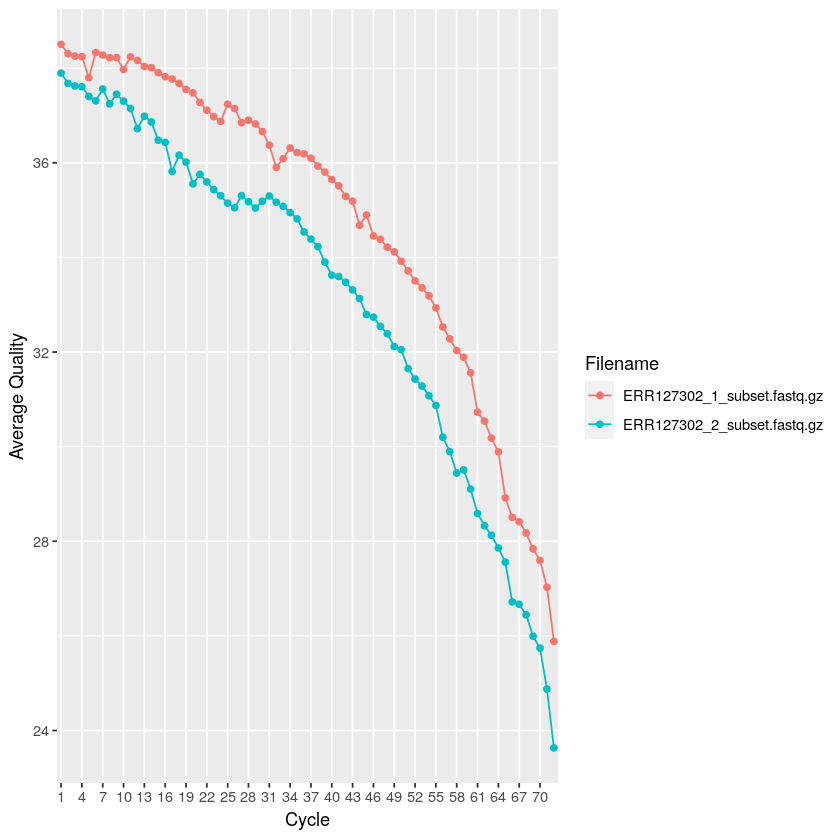

In [21]:
rqcCycleAverageQualityPlot(qcRes)

## Read frequency plot


This plot shows the degree of duplication for every read in the library. We show how to get this plot in the code below. 

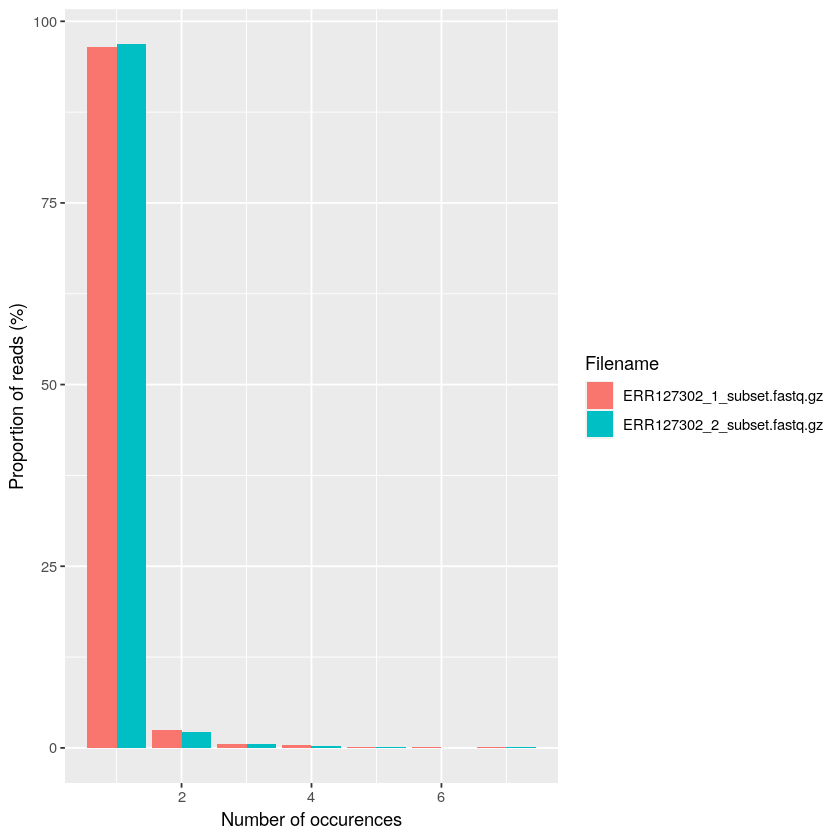

In [18]:
rqcReadFrequencyPlot(qcRes)

The percent of different duplication levels in FASTQ files. Most of the reads in all libraries have only one copy in this case.


A low level of duplication may indicate a very high level of coverage of the target sequence, but a high level of duplication is more likely to indicate some kind of enrichment bias. Two sources of duplicate reads can be found:

1. PCR duplication in which library fragments have been over-represented due to biased PCR enrichment

    - It is a concern because PCR duplicates misrepresent the true proportion of sequences in the input.

2. Truly over-represented sequences such as very abundant transcripts in an RNA-Seq library

    - It is an expected case and not of concern because it does faithfully represent the input.

Since we cannot be sure these duplicated reads are due to PCR bias or an effect of high transcription, we should not remove duplicated reads in RNA-seq analysis. However, in ChIP-seq experiments duplicated reads are more likely to be due to PCR bias.



## Heatmap of top represented reads

This heatmap plot shows dstance matrix between top represented reads. This functon only works with one result file (and not a list).

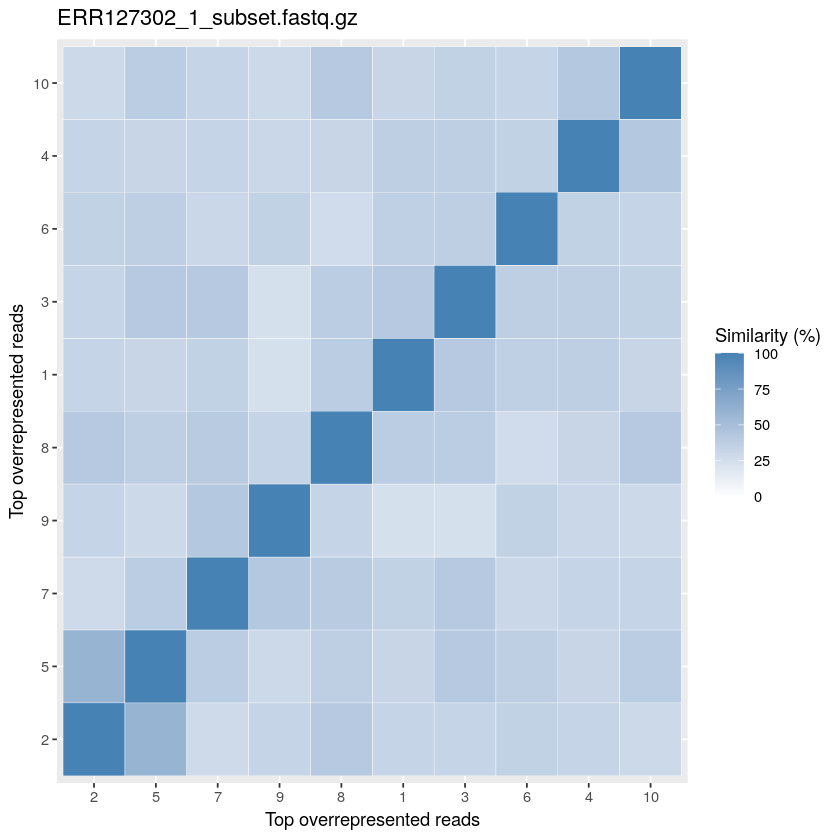

In [22]:
rqcFileHeatmap(qcRes[[1]])

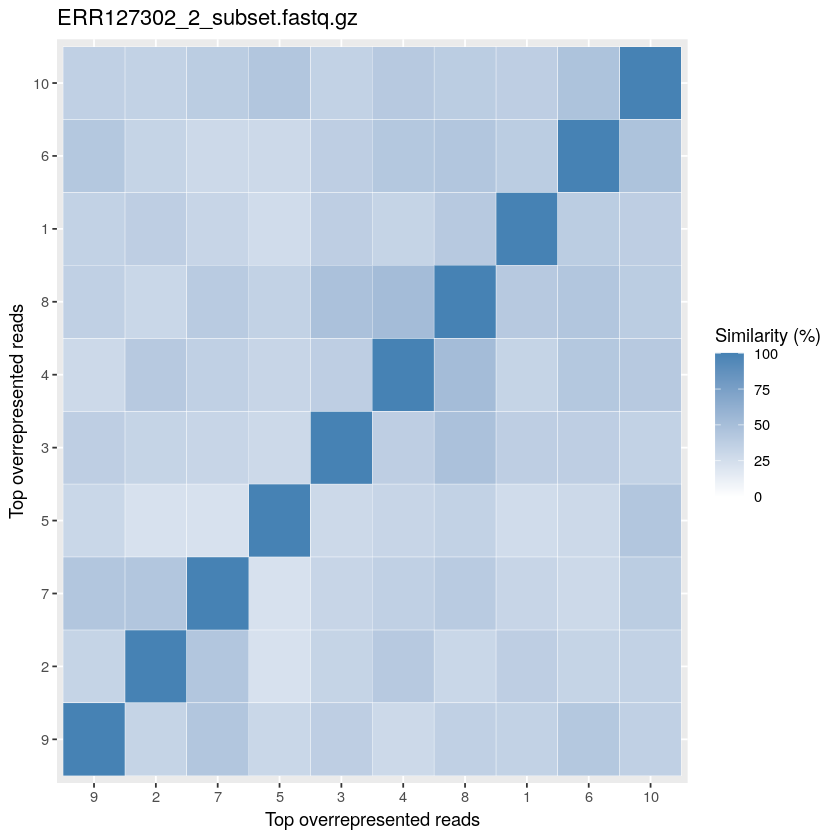

In [23]:
rqcFileHeatmap(qcRes[[2]])

## Sequence quality per base/cycle


Once we have obtaine the `qcRes` object from the quality check functio, we can generate many plots of various sequence quality metrics for our fastq files.

We will first plot “sequence quality per base/cycle”. This plot will reveal the quality scores across all bases at each position in the reads. The higher the score, the better the base call



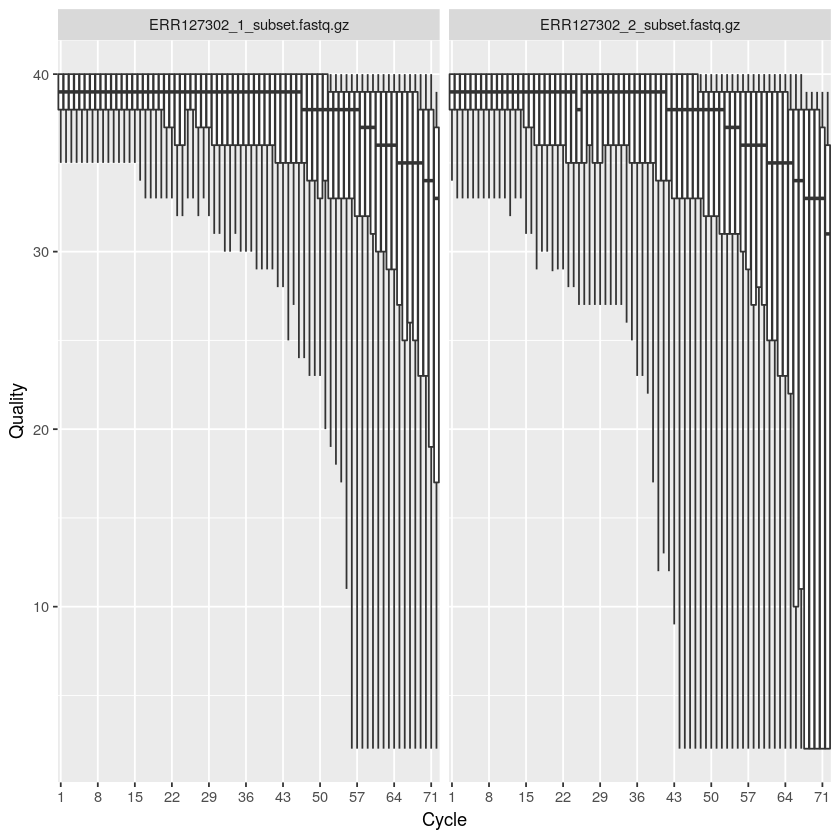

In [14]:
rqcCycleQualityBoxPlot(qcRes)

On the x-axis are the cycle of sequencing. Number of cycles is equivalent to the read length. In this example, the sample contains reads that are 71 bp long.

**The quality of reads on most platforms will drop at the end of the read. This is often due to signal decay or phasing during the sequencing run**
**Looking at quality distribution over base positions can help us decide to do trimming towards the end of the reads or no**

## Sequence content per base/cycle


Per-base sequence content plots the percentage of each of the four nucleotides (`T`, `C`, `A`, `G`) at each position across all reads in the input sequence file. The code below shows how to get this plot.


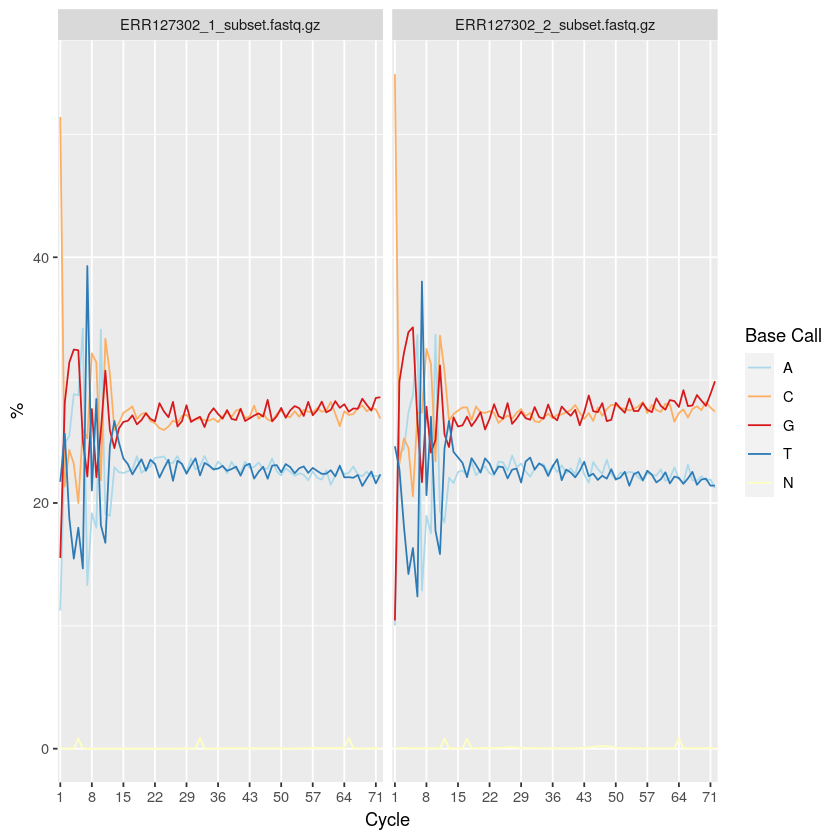

In [16]:
rqcCycleBaseCallsLinePlot(qcRes)


In a random library we would expect that there would be little to no difference between the four bases. The proportion of each of the four bases should remain relatively constant over the length of the read with `%A=%T` and `%G=%C`, and the lines in this plot should run parallel with each other.



## Other quality metrics and QC tools


Additioanl tools are exist such as: the bioconductor packages Rqc (de Souza, Carvalho, and Lopes-Cendes 2018), fastqc (Andrews, Simon. 2010), QuasR (Gaidatzis, Lerch, Hahne, et al. 2015), systemPipeR (Backman and Girke 2016), and ShortRead (Morgan, Anders, Lawrence, et al. 2009).

